In [10]:
from mrjob.job import MRJob

class MRKmeans(MRJob):

    def configure_args(self):
        super(MRKmeans, self).configure_args()
        self.add_file_arg('-centroids', help='centroid file')

    def get_centroids(self):

        centroids = []
        with open(self.options.centroids, 'r') as f:
            for line in f:
                centroid = [float(x) for x in line.strip().split()]
                centroids.append(centroid)
        print(centroids)
        return centroids


    # def mapper_init(self):
    #     with open('/home/2023/timze/centroids.txt', 'r') as cents:
    #         #contents = cents.read()
    #         #print(contents.decode('utf-8'))
    #         self.centroids = [list(map(float, line.strip().split())) for line in cents.read().splitlines()]
            #print(self.centroids)
       #with open('kmeans_data.txt', 'r') as data:
     #      # self.data = [list(map(float, line.strip().split())) for line in data.readlines()]

    def mapper(self, _, line):
        point = list(map(float, line.strip().split()))

        min_distance = float('inf')
        closest_centroid = None

        for i, centroid in enumerate(self.centroids):
            distance = sum([(point[j] - centroid[j])**2 for j in range(len(point))])
            if distance < min_distance:
                min_distance = distance
                closest_centroid = i

        yield closest_centroid, point


    def reducer(self, centroid_id, points):
        num_points = 0
        new_centroid = [0.0] * len(self.centroids[0])
        for point in points:
            num_points += 1
            for i in range(len(point)):
                new_centroid[i] += point[i]
        new_centroid = [x / num_points for x in new_centroid]

        yield centroid_id, new_centroid

if __name__ == '__main__':
    MRKmeans.run()

usage: ipykernel_launcher.py [options] [input files]
ipykernel_launcher.py: error: unrecognized arguments: --ip=127.0.0.1 --stdin=9008 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"318f9811-0e20-47b3-affc-77f7695a2bd7" --shell=9007 --transport="tcp" --iopub=9009


SystemExit: 2

c:\Users\Timze\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
from mrjob.job import MRJob

class MRKmeans(MRJob):

    def configure_args(self):
        super(MRKmeans, self).configure_args()
        self.add_file_arg('-centroids', help='centroid file')

    def get_centroids(self):

        self.centroids = []
        with open(self.options.centroids, 'r') as f:
            for line in f:
                self.centroid = [float(x) for x in line.strip().split()]
                self.centroids.append(centroid)
        #print(centroids)
        #return centroids

    def mapper(self, _, line):
        point = list(map(float, line.strip().split()))

        min_distance = float('inf')
        closest_centroid = None

        for i, centroid in enumerate(centroids):
            distance = sum([(point[j] - centroid[j])**2 for j in range(len(point))])
            if distance < min_distance:
                min_distance = distance
                closest_centroid = i

        yield closest_centroid, point


    def reducer(self, centroid_id, points):
        num_points = 0
        new_centroid = [0.0] * len(self.centroids[0])
        for point in points:
            num_points += 1
            for i in range(len(point)):
                new_centroid[i] += point[i]
        new_centroid = [x / num_points for x in new_centroid]
        print(new_centroid)

        yield centroid_id, new_centroid

if __name__ == "__main__":
    MRKmeans.run()

In [8]:
"""-1.722802010784761917e+00 1.128305903387750941e+00
-1.831571363665036367e+00 2.468868320842850128e+00
-4.809783614599630219e+00 3.015525960455176957e+00
-3.446421947001794273e+00 3.078725190054738992e+00
-5.562615643346743965e+00 -1.931946577663409048e+00
-4.252303537983434190e+00 -5.089654453130252332e-01
-4.533706605503287967e+00 2.367272443292204542e+00"""

point = -1.722802010784761917e+00, 1.128305903387750941e+00
import numpy as np

min_distance = float('inf')
closest_centroid = None

centroids = []
with open("centroids.txt", 'r') as f:
    for line in f:
        #centroid = np.fromstring(line, dtype=np.float, sep=' ')
        centroid = [float(x) for x in line.strip().split()]
        centroids.append(centroid)
    print(centroids)

for i, centroid in enumerate(centroids):
    distance = sum([(point[j] - centroid[j])**2 for j in range(len(point))])
    print(distance)
    if distance < min_distance:
        min_distance = distance
        closest_centroid = i

print(closest_centroid)

[[-2.60864839914807, -6.621185391993555], [-4.048328431059368, -7.778273889269437], [-3.550419606334364, -7.032502269708494]]
60.83933916096695
84.73523673436459
69.93897611363697
0


ValueError: 'c' argument has 1 elements, which is inconsistent with 'x' and 'y' with size 10000.

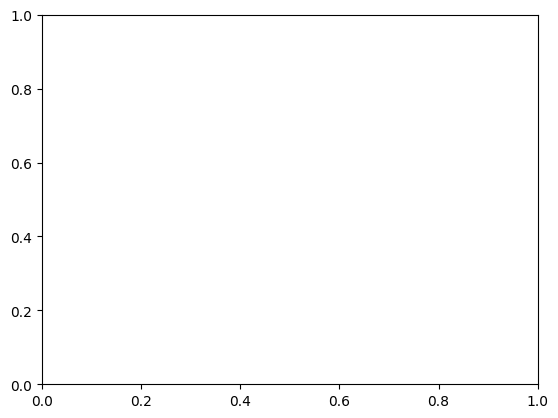

In [10]:
first_cents = [[-2.608648399148069785e+00 -6.621185391993554603e+00],[-4.048328431059368349e+00 -7.778273889269437191e+00], [-3.550419606334363820e+00 -7.032502269708493792e+00]]
cents = [[-5.797317653859121,-7.340290709264387], [-4.1721168933754464,-4.497912259449647], [-3.7564883279856325,0.2979739539094686]]

import matplotlib.pyplot as plt

with open("kmeans.txt", "r") as f:
    data = f.readlines()

x = []
y = []

for line in data:
    c = line.strip().split()
    x.append(float(c[0]))
    y.append(float(c[1]))

fig, axes = plt.subplots(nrows=1, ncols=1)
axes.scatter(x, y, c=3, alpha=0.2)
axes.scatter([c[0] for c in cents], [c[1] for c in cents], marker='*', s=200, c='#050505')
axes.scatter([c[0] for c in first_cents], [c[1] for c in first_cents], marker='*', s=200, c='#050505')
plt.show()


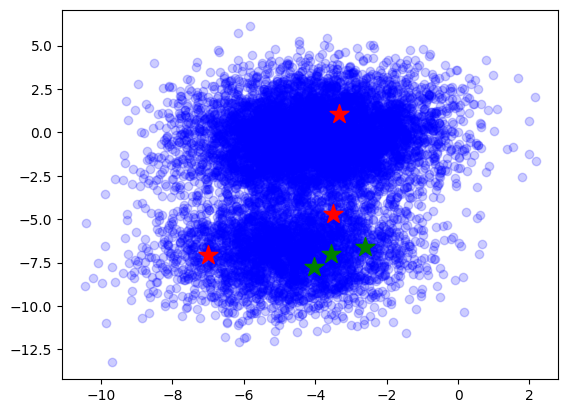

In [15]:
import matplotlib.pyplot as plt

with open("kmeans.txt", "r") as f:
    data = f.readlines()

data = [list(map(float, row.strip().split())) for row in data]
cents = [[-7.010815767077978,-7.053244155293592], [-3.5103772575001413,-4.675327060382493], [-3.3487782898619507,1.0503754957632983]]
first_cents = [[-2.608648399148069785e+00, -6.621185391993554603e+00],[-4.048328431059368349e+00, -7.778273889269437191e+00], [-3.550419606334363820e+00, -7.032502269708493792e+00]]

fig, axes = plt.subplots(nrows=1, ncols=1)
axes.scatter([row[0] for row in data], [row[1] for row in data], c='blue', alpha=0.2)
axes.scatter([centroid[0] for centroid in cents], [centroid[1] for centroid in cents], marker='*', s=200, c='red')
axes.scatter([centroid[0] for centroid in first_cents], [centroid[1] for centroid in first_cents], marker='*', s=200, c='green')
plt.show()